In [62]:
import json
#loading in lossfunctions

#the path to you kfold folder
path_to_k_fold = r"C:\Users\sofu0\OneDrive - ITU\Bachelor\kfold"

folders = ["fold0", "fold1", "fold2", "fold3", "fold4"]
subfolders = ["sub_folder0", "sub_folder1", "sub_folder2", "sub_folder3"]
# nameCNN = "LSTM_super_robin_stats09-05-2021LSTMMorten.json"
nameCNN = "super_robin_stats11-05-2021CNNsofus.json"
main_loss = []
batman_loss = []
for folder in folders:

    path_to_folder = path_to_k_fold + "\\" + folder
    local_loss = []

    for subfolder in subfolders:
        super_robin_stats = {}
        path_to_subfolder = path_to_folder + "\\" + subfolder

        path_to_json = path_to_subfolder + "\\" + nameCNN

        f = open(path_to_json)
        data = json.load(f)
        y = data["loss"]
        local_loss.append(y)

    path_to_batman_json = path_to_folder + "\\batman_results11-05-2021CNNsofus.json"
    # path_to_batman_json = path_to_folder + "\\LSTM_batman_results09-05-2021LSTMMorten.json"
    f = open(path_to_json)
    data = json.load(f)
    y = data["loss"]
    batman_loss.append(y)
    main_loss.append(local_loss)

In [63]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


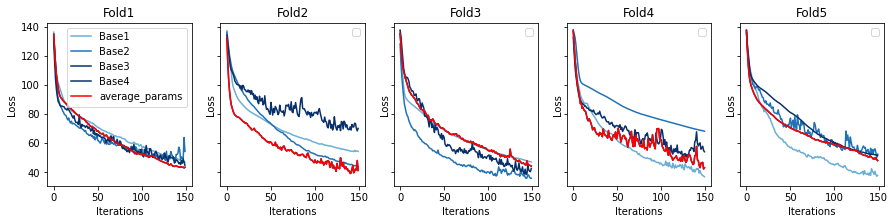

In [64]:
import numpy as np
import matplotlib.pyplot as plt
# main_loss[0][0]

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# # Create just a figure and only one subplot
# fig, ax = plt.subplots()
# ax.plot(x, y)
# ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately


f, axes = plt.subplots(1, 5, figsize=(15,3), sharey=True)

# f.suptitle("Loss CNN's", pad=20)
plots = []
for i,ax in enumerate(axes):


    cmap = get_cmap(len(axes), name="Blues")


    for j,robin in enumerate(main_loss[i]):


        x = [k for k in range(len(robin))]
        if i == 0:
            ax.plot(x,robin, c=cmap(j+2), label="Base" + str(j + 1))
        else:
            ax.plot(x,robin, c=cmap(j+2))

    if i == 0:

        ax.plot(x, batman_loss[i], color="red", label="average_params")
    else:
        ax.plot(x, batman_loss[i], color="red")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Loss")
    ax.set_title("Fold" + str(i+1))
    ax.legend()
    # plots.append(ax)
# f.legend()

f.savefig(r"C:\Users\sofu0\OneDrive - ITU\Bachelor\pictures\CNN_loss.png")
# plt.legend([ax for ax in plots],["HHZ 1", "HHN", "HHE", "lol", "ol"])